<a href="https://colab.research.google.com/github/oroobyaseen/coursera.exercises/blob/gh-pages/CNN_ResNet501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
pip install keras-resnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from keras_resnet.models import ResNet50, ResNet101, ResNet152

In [48]:
pip install Keras-Applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
pip install adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from keras_resnet.models import ResNet50, ResNet101, ResNet152
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam


In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
img_width, img_height = 224, 224

In [64]:
# Import The Libraries 

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [65]:
# importa o modelo ResNet50 e descarta a última camada do classifier.
base_model=ResNet50(weights='imagenet',include_top=False, input_shape=(img_width, img_height, 3))

In [66]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [72]:
for layer in base_model.layers:
    layer.trainable = False

In [77]:
for layer in base_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fa8b61d99d0> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fa8b61d9510> False
<keras.layers.convolutional.Conv2D object at 0x7fa8b61fdd90> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa9205c3cd0> False
<keras.layers.core.activation.Activation object at 0x7fa9337a1750> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fa8b620ef10> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa8b61d9b90> False
<keras.layers.convolutional.Conv2D object at 0x7fa8b62013d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa8b6208950> False
<keras.layers.core.activation.Activation object at 0x7fa8b620ac90> False
<keras.layers.convolutional.Conv2D object at 0x7fa8b6196e50> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa8b6196b50> False
<keras.layers.core.activation.Activation object at 0x7fa8b61a2a50> False

In [80]:
last_layer = base_model.get_layer('conv5_block3_add')
print(last_layer.output_shape)

(None, 7, 7, 2048)


In [81]:
x = Flatten()(last_layer.output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(3, activation = 'softmax')(x)
model = Model(base_model.input, x)

In [82]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [83]:
optimizer = Adam(lr=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [84]:
# Baixar as imagens do exame de citologia cervical
!wget -cq https://citologia-cervical.s3-sa-east-1.amazonaws.com/citologia.zip
!unzip -qq citologia.zip

unzip:  cannot find or open citologia.zip, citologia.zip.zip or citologia.zip.ZIP.


In [96]:
# Paths
train_Path = '/content/drive/MyDrive/New folder (4)/train'
test_Path = '/content/drive/MyDrive/New folder (4)/val'

In [97]:
train_datagen=ImageDataGenerator(preprocessing_function = preprocess_input) # incluído nas dependências

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [99]:
training_set = train_datagen.flow_from_directory(train_Path,
                                                 target_size = (img_width, img_height),
                                                 color_mode='rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

validation_set = validation_datagen.flow_from_directory(test_Path,
                                                        target_size = (img_width, img_height),
                                                        color_mode='rgb',
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle=True)

Found 2456 images belonging to 3 classes.
Found 616 images belonging to 3 classes.


In [104]:
history = model.fit(training_set,
                    steps_per_epoch=len(training_set),
                    validation_steps=len(validation_set),
                    epochs = 20,
                    validation_data = validation_set
                    )

Epoch 1/20
77/77 [==============================] - 359s 5s/step - loss: 0.8082 - accuracy: 0.7972 - val_loss: 0.3670 - val_accuracy: 0.8620
Epoch 2/20
77/77 [==============================] - 36s 462ms/step - loss: 0.5787 - accuracy: 0.8432
Epoch 3/20
77/77 [==============================] - 36s 468ms/step - loss: 0.4233 - accuracy: 0.8656
Epoch 4/20
77/77 [==============================] - 36s 465ms/step - loss: 0.3336 - accuracy: 0.8909
Epoch 5/20
77/77 [==============================] - 36s 466ms/step - loss: 0.2826 - accuracy: 0.9039
Epoch 6/20
77/77 [==============================] - 36s 470ms/step - loss: 0.2154 - accuracy: 0.9153
Epoch 7/20
77/77 [==============================] - 36s 470ms/step - loss: 0.2054 - accuracy: 0.9230
Epoch 8/20
77/77 [==============================] - 37s 479ms/step - loss: 0.1567 - accuracy: 0.9397
Epoch 9/20
77/77 [==============================] - 36s 473ms/step - loss: 0.1599 - accuracy: 0.9361
Epoch 10/20
77/77 [==============================] 

In [106]:
# Gráfico do histórico do treino
acc = history.history['accuracy']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

KeyError: ignored

In [ ]:
# salvar modelo
model.save("model.h5")
print("Modelo salvo em disco dessa instância do Google Colab")

Modelo salvo em disco dessa instância do Google Colab


In [ ]:
# métricas de perda e acurácia
score = model.evaluate_generator(validation_set, 105)

print ("%s: %.2f%%" % (model.metrics_names[0], score[0]*100))
print ("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

loss: 699.08%
acc: 54.27%


In [ ]:
# carregar modelo salvo no HD
from keras.models import load_model

model = load_model('model.h5')

In [ ]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
# visualização das camadas
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1
3 bn_conv1
4 activation_1
5 pool1_pad
6 max_pooling2d_1
7 res2a_branch2a
8 bn2a_branch2a
9 activation_2
10 res2a_branch2b
11 bn2a_branch2b
12 activation_3
13 res2a_branch2c
14 res2a_branch1
15 bn2a_branch2c
16 bn2a_branch1
17 add_1
18 activation_4
19 res2b_branch2a
20 bn2b_branch2a
21 activation_5
22 res2b_branch2b
23 bn2b_branch2b
24 activation_6
25 res2b_branch2c
26 bn2b_branch2c
27 add_2
28 activation_7
29 res2c_branch2a
30 bn2c_branch2a
31 activation_8
32 res2c_branch2b
33 bn2c_branch2b
34 activation_9
35 res2c_branch2c
36 bn2c_branch2c
37 add_3
38 activation_10
39 res3a_branch2a
40 bn3a_branch2a
41 activation_11
42 res3a_branch2b
43 bn3a_branch2b
44 activation_12
45 res3a_branch2c
46 res3a_branch1
47 bn3a_branch2c
48 bn3a_branch1
49 add_4
50 activation_13
51 res3b_branch2a
52 bn3b_branch2a
53 activation_14
54 res3b_branch2b
55 bn3b_branch2b
56 activation_15
57 res3b_branch2c
58 bn3b_branch2c
59 add_5
60 activation_16
61 res3c_branch2a
62 bn3c_branch2a

In [ ]:
for layer in model.layers[:167]:
   layer.trainable = False
for layer in model.layers[167:]:
   layer.trainable = True

In [ ]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.000001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from google.colab import drive
from keras.callbacks import *

drive.mount('/content/drive')
filepath="/content/drive/My Drive/Colab Notebooks/log/resnet50:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregando o modelo com o peso melhor treinado (exemplo: carregando epoch 47, validation accuracy de 90.5%)

model.load_weights('/content/drive/My Drive/Colab Notebooks/log/resnet50:030-val_acc:0.629.hdf5')

In [ ]:
# Fine-tune
history = model.fit_generator(training_set,
                    steps_per_epoch=528/32,
                    epochs = 100,
                    validation_data = validation_set,
                    validation_steps = 105/32,
                    callbacks=callbacks_list)

Epoch 1/100
17/16 [==============================] - 8s 497ms/step - loss: 0.0274 - acc: 0.9963 - val_loss: 7.0440 - val_acc: 0.5524

Epoch 00001: val_acc did not improve from 0.61905
Epoch 2/100
17/16 [==============================] - 3s 186ms/step - loss: 0.0297 - acc: 0.9982 - val_loss: 6.8002 - val_acc: 0.5524

Epoch 00002: val_acc did not improve from 0.61905
Epoch 3/100
17/16 [==============================] - 4s 226ms/step - loss: 1.4234e-04 - acc: 1.0000 - val_loss: 6.7798 - val_acc: 0.5524

Epoch 00003: val_acc did not improve from 0.61905
Epoch 4/100
17/16 [==============================] - 4s 254ms/step - loss: 0.0109 - acc: 0.9963 - val_loss: 6.9305 - val_acc: 0.5524

Epoch 00004: val_acc did not improve from 0.61905
Epoch 5/100
17/16 [==============================] - 4s 247ms/step - loss: 0.1040 - acc: 0.9920 - val_loss: 7.9186 - val_acc: 0.4857

Epoch 00005: val_acc did not improve from 0.61905
Epoch 6/100
17/16 [==============================] - 4s 251ms/step - loss: 1

In [ ]:
model.save("model.h5")
uploaded = drive.CreateFile({'title': 'model.h5'})
uploaded.SetContentFile('model.h5')
uploaded.Upload()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


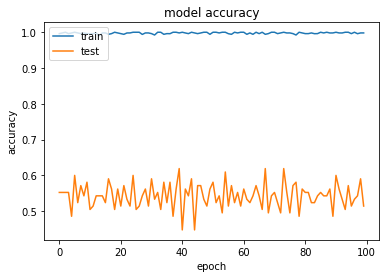

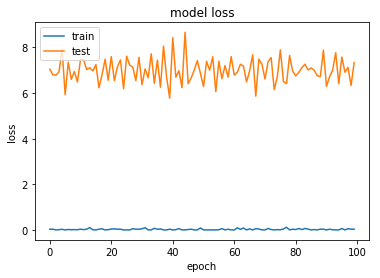

In [ ]:
import matplotlib.pyplot as plt

# listar todos os dados no history
print(history.history.keys())
# Gráfico de treino - acurácia
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Gráfico de treino - perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
!pip install --upgrade --quiet PyDrive
# para conectar com o Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Importando imagens de teste do drive

link = 'https://drive.google.com/open?id=1sbjcK__NABa7gfsPOt7JM8jAaXCLCfKW'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('teste1_cytHigh-grade Squamous Intraepithelial Lesion - 14659.jpg')

link = 'https://drive.google.com/open?id=1vDBjgozlaLg0tcGQ50b9wpOBz_NYyx8o'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('teste2_cyt14721.jpg')

link = 'https://drive.google.com/open?id=14mCco19UM0k83Irdz3xk2lQaOs7a1YuK'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('teste3_cytoCandida - 7557.jpg')

In [ ]:
# Testando o modelo

test_image = image.load_img('teste1_cytHigh-grade Squamous Intraepithelial Lesion - 14659.jpg', target_size = (200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 0:
    diagnostico = 'Carcinoma'
elif result[0][0] == 1:
    diagnostico = 'Normal'
else:
    diagnostico = 'Outros problemas'
    
print ('Diagnóstico:', diagnostico)

Diagnóstico: Normal


In [ ]:
# Salvando o modelo no drive

uploaded = drive.CreateFile({'title': 'model.h5'})
uploaded.SetContentFile('model.h5')
uploaded.Upload()

In [ ]:
# Importando o modelo do drive

link = 'https://drive.google.com/open?id=1b8QkLS1nix4K5g46SGFAR4Cnx1D6eoF1'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('model.h5')